In [4]:
#1
import pandas as pd

# Read CSV file
#file_path = ''  # Replace with your file path
df = pd.read_csv('CustomerChurn.csv')

# Check for missing or null values
missing_values = df.isnull().sum()

# Print the columns with missing values
print("Missing values in each column:")
print(missing_values)

# Print rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing)

# Summary of missing values
total_missing = missing_values.sum()
print(f"\nTotal number of missing values in the dataset: {total_missing}")

if total_missing > 0:
    print("\nColumns with missing values:")
    for column, count in missing_values.items():
        if count > 0:
            print(f"{column}: {count} missing values")
else:
    print("\nNo missing values in the dataset.")


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Rows with missing values:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

Total number of missing values in the dataset: 0

No missing values in the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


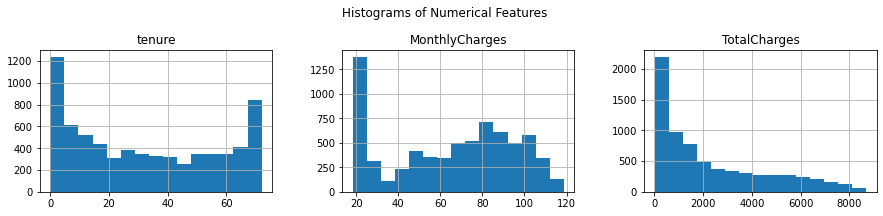

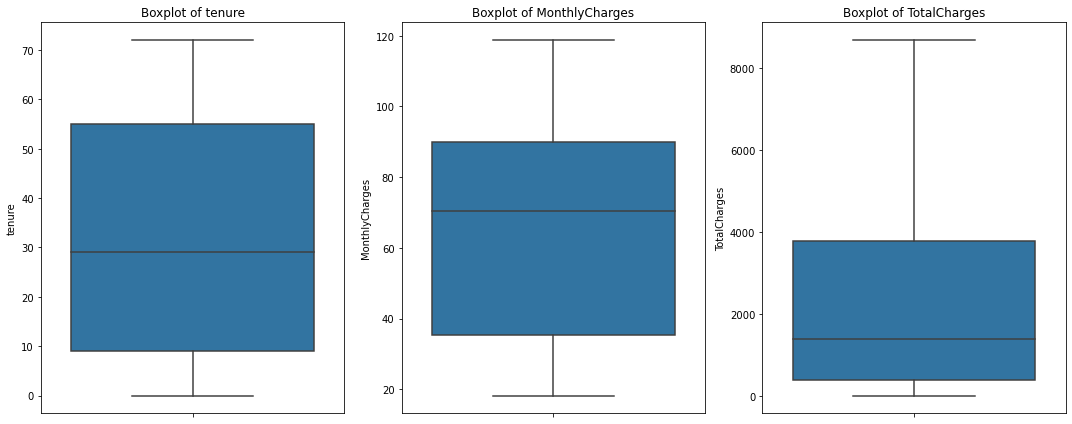

In [5]:
#2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'CustomerChurn.csv'
df = pd.read_csv(file_path)

# Convert the 'Churn' column to numerical values
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ensure 'TotalCharges' is numeric (some values may be non-numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values and handle them (e.g., fill with mean or drop)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# List of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Display summary statistics
print(df.describe())

# Visualizing distributions of numerical features

# Histograms
df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots
plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


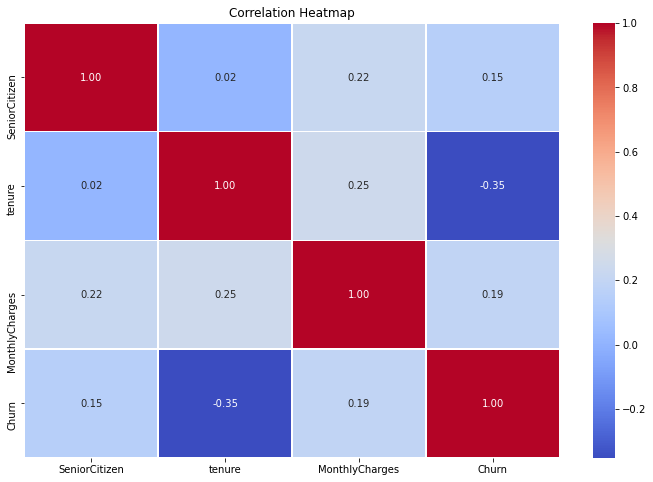

In [3]:
#3
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


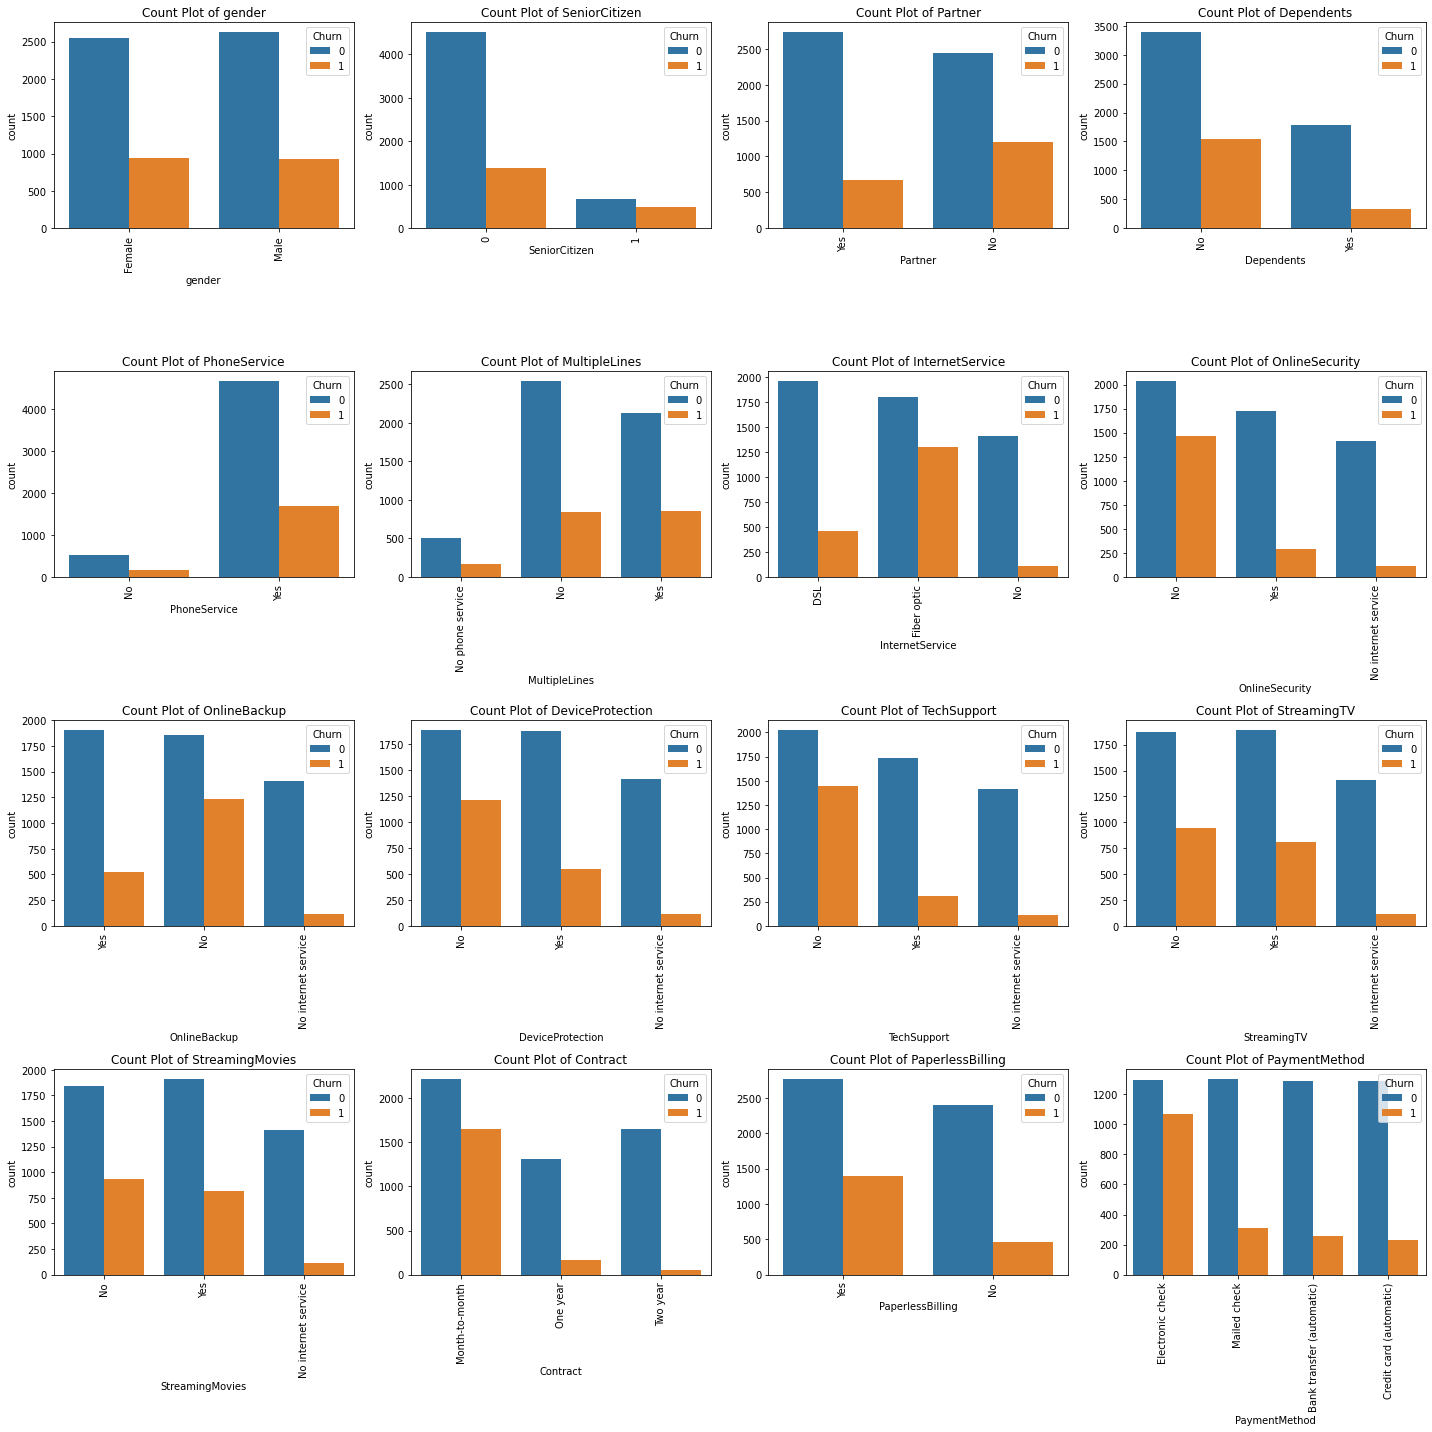

In [6]:
#4
# List of categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Bar plots for categorical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


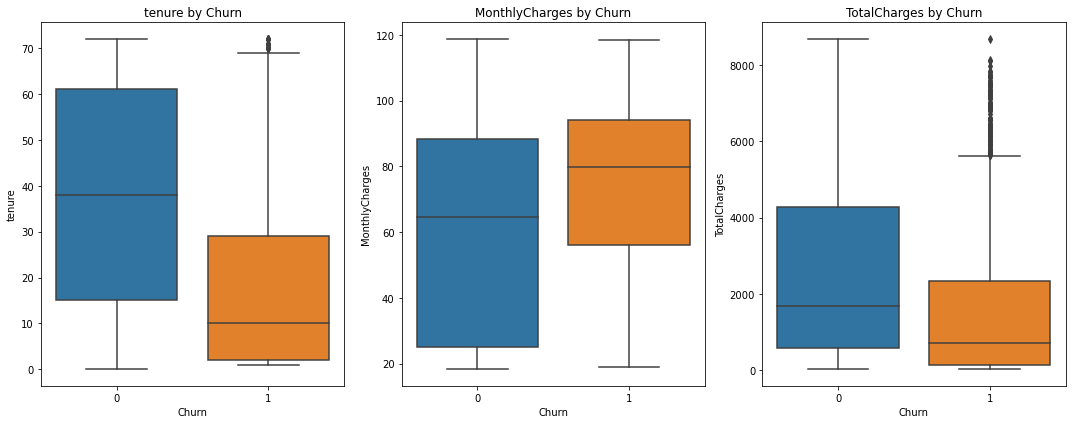

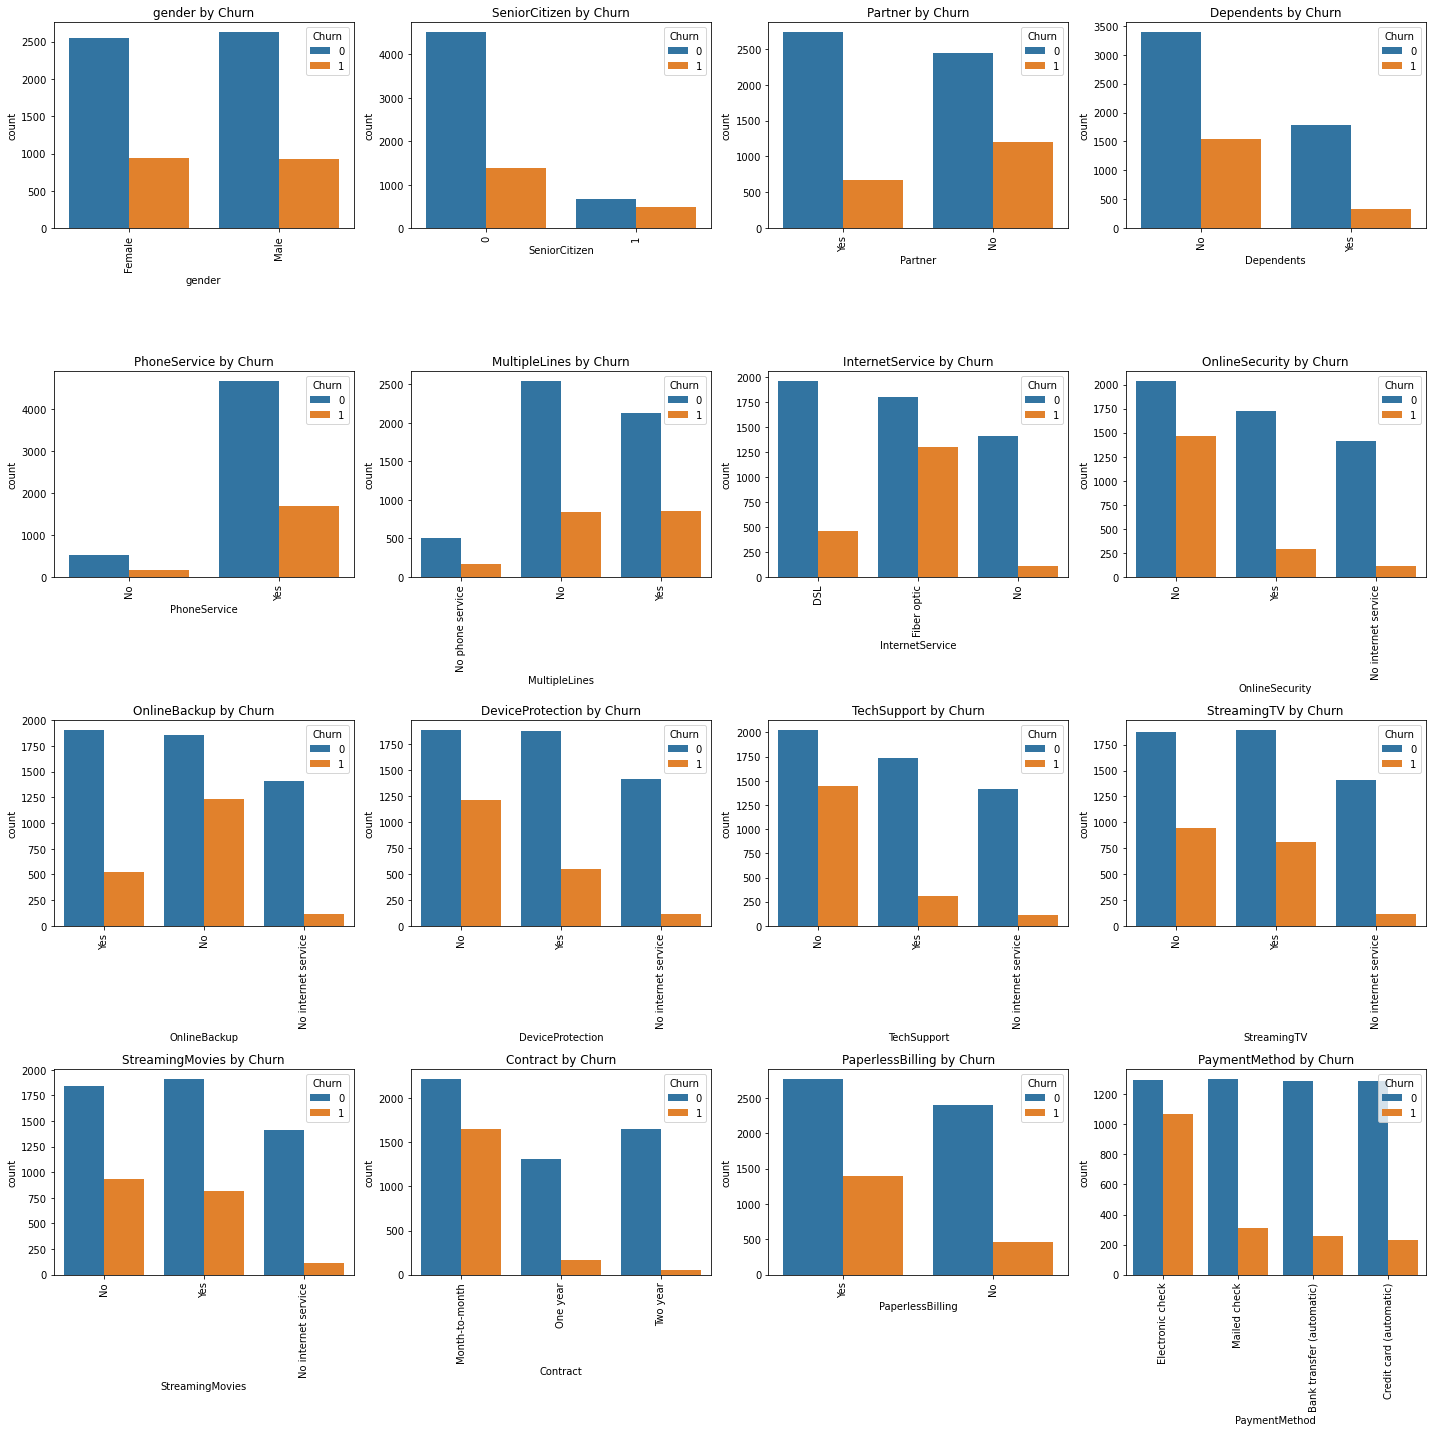

In [7]:
#5
# Compare features between churned and non-churned customers

# Numerical features
plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
plt.tight_layout()
plt.show()

# Categorical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'{feature} by Churn')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

file_path = 'CustomerChurn.csv'
df = pd.read_csv(file_path)

# Convert the 'Churn' column to numerical values
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop(columns=['Churn'])
y = df['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print feature importances
print(feature_importances)


tenure              0.154153
MonthlyCharges      0.142098
TotalCharges        0.135083
customerID          0.130084
Contract            0.082277
OnlineSecurity      0.046484
PaymentMethod       0.044518
TechSupport         0.034984
OnlineBackup        0.025734
gender              0.024202
InternetService     0.023643
PaperlessBilling    0.022550
DeviceProtection    0.021177
MultipleLines       0.020165
Partner             0.019498
SeniorCitizen       0.017799
Dependents          0.017132
StreamingMovies     0.016817
StreamingTV         0.016302
PhoneService        0.005301
dtype: float64


In [7]:
# so from the correlation above we will choose tenure, monthly charges, total charges and online security PaymentMethod 
#& TechSupport as our independent variables as they have strong correlation with the dependent variables i.e, Churn.

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

file_path = 'CustomerChurn.csv'
df = pd.read_csv(file_path)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Selected features based on importance
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'OnlineSecurity', 'PaymentMethod', 'TechSupport']

X = df[selected_features]
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.794180269694819
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.64      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

file_path = 'CustomerChurn.csv'
df = pd.read_csv(file_path)

df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'OnlineSecurity', 'PaymentMethod', 'TechSupport']

X = df[selected_features]
y = df['Churn']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'max_iter': [100, 200, 300]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'saga'], 'max_iter': [100, 200, 300]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'max_iter': [100, 200, 300], 'l1_ratio': [0, 0.5, 1]}
]

# Initialize the Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions
y_pred = best_log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Output
print("Best Parameters:")
print(grid_search.best_params_)


Fitting 5 folds for each of 105 candidates, totalling 525 fits
Accuracy: 0.7991483321504613
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.51      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Best Parameters:
{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
#Both decision tree and Logistic regression gives an accuracy of 79.914%, almost equivalent to 80%